# Online Store: Boosting Revenue with Marketing Hypotheses

We work for the analytical department at an online store. With the help of the marketing department, we've compiled a list of hypotheses that may help boost revenue. We will prioritize these hyoptheses, launch an A/B test, and analyze the results. We've been provided with the following data:
- Nine hypotheses on boosting the store's revenue
- Server logs with data on the store's visits from **August 2019**
- Dump file with all orders from **August 2019**

# Table of Contents
[1 Open the data file and have a look at the general information](#1heading)  
&emsp;[1.1 Conclusion](#1.1heading)  
[2 Data preprocessing](#2heading)  
&emsp;[2.1 Processing missing values](#2.1heading)  
&emsp;[2.2 Data type replacement](#2.2heading)  
&emsp;[2.3 Processing duplicates](#2.3heading)  
&emsp;[2.4 Extra Preprocessing](#2.4heading)  
[3 Prioritizing Hypotheses](#3heading)   
[4 A/B Test Analysis](#4heading)  
&emsp;[4.1 Cumulative Revenue by Group](#4.1heading)   
&emsp;[4.2 Cumulative Average Order Size by Group](#4.2heading)  
&emsp;[4.3 Difference in Cumulative Average Order Size for Group B Compared to Group A](#4.3heading)  
&emsp;[4.4 Conversion Rate](#4.4heading)  
&emsp;[4.5 Orders Per User](#4.5heading)  
&emsp;[4.6 Order Prices](#4.6heading)  
&emsp;[4.7 Difference in conversion between the groups using the raw data](#4.7heading)  
&emsp;[4.8 Difference in average order size between the groups using the raw data](#4.8heading)  
&emsp;[4.9 Difference in conversion between the groups using the filtered data](#4.9heading)  
&emsp;[4.10 Difference in average order size between the groups using the filtered data](#4.10heading)  
[5 Conclusion](#5heading)  

<a id='1heading'></a>

## Open the data files and have a look at the general information

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import datetime as dt
import seaborn as sns
from math import factorial
from scipy import stats as st
from functools import reduce

In [2]:
#Read files
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [3]:
#Check hypotheses dataframe and the data info
display(hypotheses)
hypotheses.info()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#Check orders first five rows and the data info
display(orders.head())
orders.info()
orders.describe()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [5]:
#Check visits first five rows and the data info
display(visits.head())
visits.info()
visits.describe()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


<a id='1.1heading'></a>

### Conclusion

<div class="alert alert-info">
    
Hypotheses dataframe contains 5 columns: **Hypotheses, Reach, Impact, Confidence, and Effort**
- **Hypotheses** contains brief descriptions of the hypotheses; **Reach** is user reach, on a scale of one to ten; **Impact** is impact on users, on a scale of one to ten; **Confidence** is confidence in the hypothesis, on a scale of one to ten; **Effort** is the resources required to test a hypothesis, on a scale of one to ten.
- Total of 9 rows. Data types are fine.

Orders dataframe contains 5 columns: **transactionId, visitorId, date, revenue, and group**
- **TransactionId** is the order identifier, **visitorId** is the identifier of the user who placed the order, **date** is the date of the order, **revenue** is the revenue from the order, and **group** is the A/B test group that the user belongs to.
- There are a total of 1197 rows. Data types need updating.

Visits dataframe contains 3 columns: **date, group, and visits**
- **Date** is the date of the visits, **group** is the A/B test group that users belong to, and **visits** is the number of visits on the date.
- There are a total of 62 rows. Data types need updating.

</div>

<a id='2heading'></a>

## Data preprocessing

<a id='2.1heading'></a>

### Processing missing values

In [6]:
#count of nulls for hypotheses
print('Total Rows:', len(hypotheses))
hypotheses.isnull().sum()

Total Rows: 9


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

In [7]:
#count of nulls for orders
print('Total Rows:', len(orders))
orders.isnull().sum()

Total Rows: 1197


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [8]:
#count of nulls for visits
print('Total Rows:', len(visits))
visits.isnull().sum()

Total Rows: 62


date      0
group     0
visits    0
dtype: int64

<a id='2.2heading'></a>

### Data type replacement

In [9]:
#Check hypotheses dtypes
hypotheses.dtypes

Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Effort         int64
dtype: object

In [10]:
#Check orders dtypes
orders.dtypes

transactionId      int64
visitorId          int64
date              object
revenue          float64
group             object
dtype: object

In [11]:
#Change orders dtypes
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%dT%H:%M:%S')
#orders['group'] = orders['group'].astype('category')
orders.dtypes

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                 float64
group                    object
dtype: object

In [12]:
#Check visits dtypes
visits.dtypes

date      object
group     object
visits     int64
dtype: object

In [13]:
#Change visits dtypes
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%dT%H:%M:%S')
#visits['group'] = visits['group'].astype('category')
visits.dtypes

date      datetime64[ns]
group             object
visits             int64
dtype: object

<a id='2.3heading'></a>

### Processing duplicates

In [14]:
#Functions for duplicates
def duplicates_func(dataframe):
    print('Total duplicates:', dataframe.duplicated().sum())

In [15]:
#Duplicates for hypotheses
duplicates_func(hypotheses)

Total duplicates: 0


In [16]:
#Duplicates for orders
duplicates_func(orders)

Total duplicates: 0


In [17]:
#Duplicates for visits
duplicates_func(visits)

Total duplicates: 0


Time to search for duplicates in orders dataframe based on 'visitorId', 'date', and 'revenue'.

In [18]:
#Drop duplicates based on 'visitorId', 'date', and 'revenue'
duplicates = orders[orders.duplicated(subset=['visitorId', 'date', 'revenue'], keep=False)].sort_values(by='visitorId')
display(duplicates)
print('Total rows:', len(duplicates))

,transactionId,visitorId,date,revenue,group
970,3478707774,2587333274,2019-08-08,60.4,A
972,2419539947,2587333274,2019-08-08,60.4,B
556,571224785,3941503500,2019-08-06,80.8,B
558,3621273697,3941503500,2019-08-06,80.8,B
662,1811671147,4266935830,2019-08-29,1220.2,A
682,1216533772,4266935830,2019-08-29,1220.2,B


Total rows: 6


In [19]:
#Dropping duplicates in orders dataframe
orders = orders.drop_duplicates(subset=['visitorId', 'date', 'revenue'])
print('Duplicate orders left: ', orders.duplicated(subset=['visitorId', 'date', 'revenue']).sum())

Duplicate orders left:  0


Time to look for users in both groups.

In [20]:
#Get duplicates for orders by visitorId column
duplicates2 = orders[orders.duplicated(subset=['visitorId', 'group'], keep=False)]
duplicates2.sort_values(by='visitorId')

,transactionId,visitorId,date,revenue,group
26,2223239646,199603092,2019-08-15,55.7,A
823,2971973105,199603092,2019-08-27,45.9,A
134,62794304,199603092,2019-08-22,110.3,A
1102,1941707234,199603092,2019-08-12,100.0,A
41,2594268419,237748145,2019-08-15,20.8,A
...,...,...,...,...,...
1019,453824282,4256040402,2019-08-31,30.5,B
1018,1415970216,4256040402,2019-08-31,80.5,A
60,1421016313,4256040402,2019-08-16,875.5,B
1091,750632879,4256040402,2019-08-12,5.8,A


In [21]:
print('Number of duplicate users:', duplicates2['visitorId'].nunique())

Number of duplicate users: 58


In [22]:
#Checking amount of buyers in both groups
print('Total amount of buyers:',orders['visitorId'].nunique())
print('Amount of buyers in both groups:', duplicates2['visitorId'].nunique())
print('Ratio = {:.2%}'.format(duplicates2['visitorId'].nunique()/orders['visitorId'].nunique()))

Total amount of buyers: 1031
Amount of buyers in both groups: 58
Ratio = 5.63%


In [23]:
#Checking amount of orders in both groups
print('Total orders:', len(orders))
print('Total orders with mixed grouping:', len(duplicates2))
print('Ratio = {:.2%}'.format(len(duplicates2)/len(orders)))

Total orders: 1194
Total orders with mixed grouping: 169
Ratio = 14.15%


In [24]:
#Dropping duplicates in orders dataframe
orders = orders.drop_duplicates(subset=['visitorId', 'group'], keep=False)
print('Duplicate orders left: ', orders.duplicated(subset=['visitorId', 'group']).sum())

Duplicate orders left:  0


<div class="alert alert-info">

We've checked for participants who took part in both groups of our experiment. We can't trust the results provided by these users since their purchasing behaviors were probably influenced from seeing both versions of the online store. About 5.63% of the buyers took part in both groups, and we have removed them and their purchases from the orders dataframe.
&nbsp;
    
&nbsp;
    
If possible, I'd recommend our team to restart the test and make sure users are not placed in both A/B. Note that this approach may not be feasible at times.
&nbsp;
    
&nbsp;
    
**Therefore, we will continue our analysis without the orders of users who partook in both groups.**
</div>

<a id='2.4heading'></a>

### Extra Preprocessing

orders.head()

visits.head()

#Obtaining cumulative data

datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'first', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'first', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group']) 

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

display(cumulativeData.head(10)) 

#Building an array with unique paired date-group values 
datesGroups = orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)
datesGroups

#Obtaining number or orders per day
result_transactionId = orders.pivot_table(index=['date', 'group'], values='transactionId', aggfunc='nunique')
del result_transactionId['date']
del result_transactionId['group']
result_transactionId.reset_index(inplace=True)
result_transactionId

#Obtaining number of visitors per day
result_visitorId = orders.pivot_table(index=['date', 'group'], values='visitorId', aggfunc='nunique')
del result_visitorId['date']
del result_visitorId['group']
result_visitorId.reset_index(inplace=True)
result_visitorId

#Obtaining revenue per day
result_revenue = orders.pivot_table(index=['date', 'group'], values='revenue', aggfunc='sum')
result_revenue.reset_index(inplace=True)
result_revenue

#Obtaining visits per day
result_visits = visits.pivot_table(index=['date', 'group'], values='visits', aggfunc='sum')
result_visits.reset_index(inplace=True)
result_visits

#Combining columns into one table - no need to merge or join
cumulativeData = datesGroups.copy()
cumulativeData['transactionId'] = result_transactionId['transactionId']
cumulativeData['visitorId'] = result_visitorId['visitorId']
cumulativeData['revenue'] = result_revenue['revenue']
cumulativeData['visits'] = result_visits['visits']

cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visits',
]
cumulativeData

<a id='3heading'></a>

## Prioritizing Hypotheses

In [25]:
pd.set_option('max_colwidth', -1)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


<div class="alert alert-info">
    
Parameters are rated on a scale of 1 to 10.
    
</div>

In [26]:
#Adding ICE framework to prioritize hypotheses
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence'])/hypotheses['Effort']

#Adding RICE framework to prioritize hypotheses
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'])/hypotheses['Effort']

hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


In [27]:
#Displaying hypothesis in order of prioritiy based on ICE method
display(hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


In [28]:
#Displaying hypothesis in order of prioritiy based on RICE method
display(hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


<div class="alert alert-info">

The difference between the ICE and RICE frameworks is that RICE includes Reach in its calculation. The priority results are similar for both frameworks, with minor differences:
- Hypothesis 2 changes from medium priority in ICE to being \#2 on our RICE list.
- Hypothesis 8 goes from being \#1 to being medium priority in RICE.
- Hypotheses 0 and 7 still remain in the top three.
- Hypothesis 6 remains the same at \#4.
- Hypotheses 3, 1, 5, and 4 stay in the same low priority range.

</div>

<a id='4heading'></a>

## A/B Test Analysis

<a id='4.1heading'></a>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~I will continue to review your project after returning rows. :)~ 
</div>


In [29]:
orders_2 = pd.read_csv('/datasets/orders_us.csv', parse_dates=['date'])

orders_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [30]:
visits_2 = pd.read_csv('/datasets/visits_us.csv', parse_dates=['date'])
visits_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [31]:
#building an array with unique paired date-group values 
datesGroups = orders_2[['date', 'group']].drop_duplicates()

#Obtaining transactionId column
ordersAggregated1 = datesGroups.apply(lambda x: orders_2[np.logical_and(orders_2['date'] <= x['date'], orders_2['group'] == x['group'])].agg({'date' : 'max', 'transactionId' : pd.Series.nunique}), axis=1)

#Obtaining visitorId column
ordersAggregated2 = datesGroups.apply(lambda x: orders_2[np.logical_and(orders_2['date'] <= x['date'], orders_2['group'] == x['group'])].agg({'date' : 'max', 'visitorId' : pd.Series.nunique}), axis=1)

#Obtaining revenue column
ordersAggregated3 = datesGroups.apply(lambda x: orders_2[np.logical_and(orders_2['date'] <= x['date'], orders_2['group'] == x['group'])].agg({'date' : 'max', 'revenue' : 'sum'}), axis=1)

#Obtaining visits column
visitorsAggregated1 = datesGroups.apply(lambda x: visits_2[np.logical_and(visits_2['date'] <= x['date'], visits_2['group'] == x['group'])].agg({'date' : 'max', 'visits' : 'sum'}), axis=1)

#Combining columns into one table - no need to merge or join
cumulativeData = datesGroups.copy()
cumulativeData['transactionId'] = ordersAggregated1['transactionId']
cumulativeData['visitorId'] = ordersAggregated2['visitorId']
cumulativeData['revenue'] = ordersAggregated3['revenue']
cumulativeData['visits'] = visitorsAggregated1['visits']
cumulativeData = cumulativeData.sort_values(by=['date','group']).reset_index(drop=True)

#Assigning column names
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visits',
]
cumulativeData.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


### Cumulative Revenue by Group

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


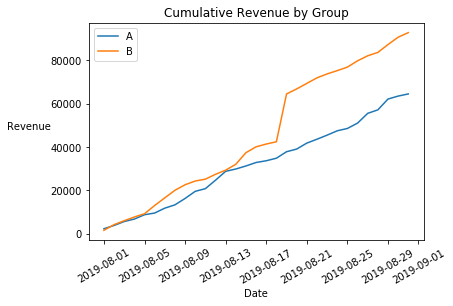

In [32]:
# DataFrame with cumulative orders and cumulative revenue by day, group A and group B
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A and B revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Cumulative Revenue by Group')
plt.xlabel('Date', rotation=0)
plt.xticks(rotation=30)
plt.ylabel('Revenue           ', rotation=0)
plt.legend()
plt.show()

<div class="alert alert-info">
It seems that Group B accomuluated more revenue in the month of August. We do see a spike on date 2019-08-19 for Group B, which takes into account an outlier dealt with in section 4.6.
</div>

<a id='4.2heading'></a>

### Cumulative Average Order Size by Group

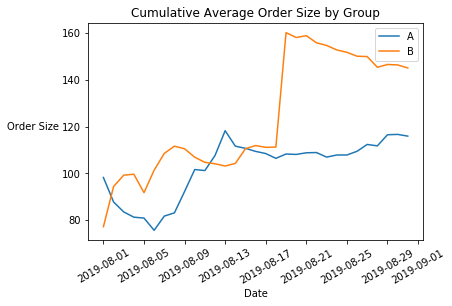

In [33]:
#Plotting graph showing daily average order size for each group
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Cumulative Average Order Size by Group')
plt.xlabel('Date', rotation=0)
plt.xticks(rotation=30)
plt.ylabel('Order Size                ', rotation=0)
plt.legend()
plt.show()

<div class="alert alert-info">
By looing at this graph, we can see that Group B had bigger average order sizes throughout the month of August. We do see a spike on date 2019-08-19 for Group B, which takes into account an outlier dealt with in section 4.6.
</div>

<a id='4.3heading'></a>

### Difference in Cumulative Average Order Size for Group B Compared to Group A

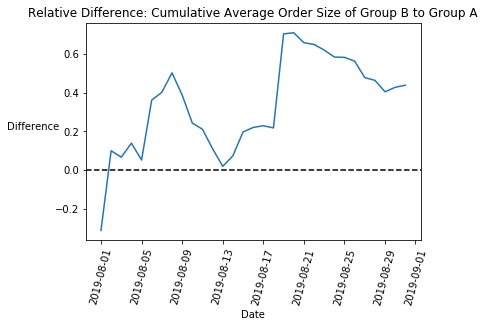

In [34]:
#Plotting graph showing the differene in daily average order size for Group B compared to Group A
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersB'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative Difference: Cumulative Average Order Size of Group B to Group A')
plt.xlabel('Date', rotation=0)
plt.xticks(rotation=75)
plt.ylabel('Difference           ', rotation=0)
plt.show()

<div class="alert alert-info">
Our graph shows that the difference in cumulative average orders size is bigger for Group B compared to Group A.
</div>

<a id='4.4heading'></a>

### Conversion Rate

In [35]:
#Adding conversion column
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

#Separating data by groups
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

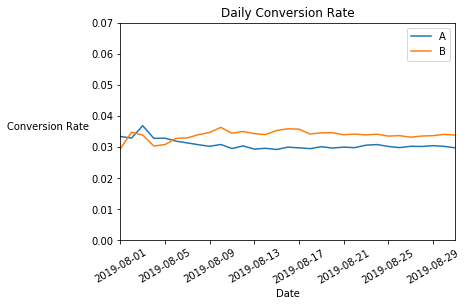

In [36]:
#Plotting daily conversion rate
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Daily Conversion Rate')
plt.xlabel('Date', rotation=0)
plt.xticks(rotation=30)
plt.ylabel('Conversion Rate                         ', rotation=0)
plt.legend()
plt.axis(["2019-08-01", '2019-08-31', 0, 0.07])
plt.show()

<div class="alert alert-info">
Group B seems to have a higher daily conversion rate, but we don't know yet if the difference is significant.
</div>

<a id='4.5heading'></a>

### Orders Per User

In [37]:
#Dataframe containing orders placed by user
ordersByUsers = (
    orders_2.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.head()

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


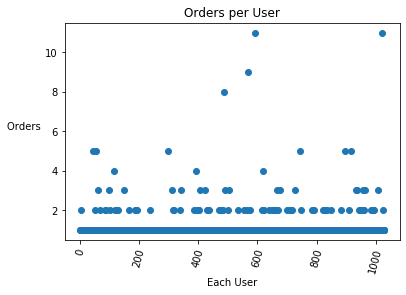

In [38]:
#Plotting histogram with scatter method for the number of order per user
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transactionId'])
plt.title('Orders per User')
plt.xlabel('Each User', rotation=0)
plt.xticks(rotation=75)
plt.ylabel('Orders           ', rotation=0)
plt.show()

<div class="alert alert-info">
Most of the users placed 1 through 3 orders. We have a couple of outliers that placed 5 or more orders.
</div>

In [39]:
#Calculating 95th and 99th percentiles for the number of orders per user
print(np.percentile(ordersByUsers['transactionId'], [95, 99])) 

[2. 4.]


<div class="alert alert-info">
We will consider users who placed 4 for more orders as anomalies.
</div>

<a id='4.6heading'></a>

### Order Prices

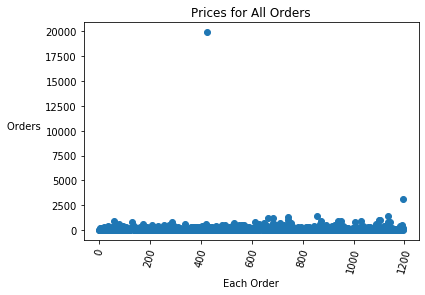

In [40]:
#Plotting histogram with scatter method for the number of order per user
x_values = pd.Series(range(0,len(orders_2['revenue'])))

plt.scatter(x_values, orders_2['revenue'])
plt.title('Prices for All Orders')
plt.xlabel('Each Order', rotation=0)
plt.xticks(rotation=75)
plt.ylabel('Orders           ', rotation=0)
plt.show()

<div class="alert alert-info">
This plot shows the outlier that influenced the charts in sections 4.1 and 4.2. Please take note of the outlier who placed an order of almost 20,000 dollars.
</div>

In [41]:
#Calculating 95th and 99th percentiles for the prices of orders
print(np.percentile(orders_2['revenue'], [95, 99])) 

[435.54  900.904]


<div class="alert alert-info">
We will consider orders with prices above 900.9 as anomalies.
</div>

<a id='4.7heading'></a>

### Difference in conversion between the groups using the raw data

In [42]:
#Obtaining orders by users by group in two dataframes
ordersByUsersA = orders_2[orders_2['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders_2[orders_2['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [43]:
#Samples of users who made orders, with their corresponding numbers of orders
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

<ins>Experiment<ins/>

Null Hypothesis H0: The conversion rates for Sample A and Sample B are the same

Alternative Hypothesis H1: The conversion rates for Sample A and Sample B are different

In [44]:
#Experiment: The Wilcoxon-Mann-Whitney Nonparametric Test

alpha = 0.05 #critical statistical significance level

results = st.mannwhitneyu(sampleA, sampleB)[1]

if results < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    
print("Relative Difference in Conversion Rates between groups: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

We reject the null hypothesis
Relative Difference in Conversion Rates between groups: 0.138


<div class="alert alert-info">
The p-value is lower than 0.05, so we rejected the null hypothesis. The raw data analysis showed that the groups' conversion rates have statistically significant differences. The relative comparison gain for group B compared to group A is 13.8%.
</div>

<a id='4.8heading'></a>

### Difference in average order size between the groups using the raw data

<ins>Experiment<ins/>

Null Hypothesis H0: The average order sizes for Sample A and Sample B are the same

Alternative Hypothesis H1: The average order sizes for Sample A and Sample B are different

In [45]:
#Experiment: The Wilcoxon-Mann-Whitney Nonparametric Test

alpha = 0.05 #critical statistical significance level

results = st.mannwhitneyu(orders_2[orders_2['group']=='A']['revenue'], orders_2[orders_2['group']=='B']['revenue'])[1]

if results < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    
print("Relative Difference in Average Order Size between groups: {0:.3f}".format(orders_2[orders_2['group']=='B']['revenue'].mean()/orders_2[orders_2['group']=='A']['revenue'].mean()-1))

We can't reject the null hypothesis
Relative Difference in Average Order Size between groups: 0.252


<div class="alert alert-info">
The p-value is greater than 0.05, so we accept the null hypothesis. The raw data analysis showed that the groups' average order sizes haev no statistically significant differences. The relative comparison gain for group B compared to group A is 25.2%.
</div>

<a id='4.9heading'></a>

### Difference in conversion between the groups using the filtered data

In [46]:
#Filtering data by using the 99th percentile
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3.5]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 3.5]['visitorId']], axis = 0)

usersWithExpensiveOrders = orders_2[orders_2['revenue'] > 900.9]['visitorId']

#List of abnormal users
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
Name: visitorId, dtype: int64


In [47]:
#Filtered samples without anomalies
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

<ins>Experiment<ins/>

Null Hypothesis H0: The conversion rates for Sample A and Sample B are the same

Alternative Hypothesis H1: The conversion rates for Sample A and Sample B are different

In [48]:
#Experiment: The Wilcoxon-Mann-Whitney Nonparametric Test

alpha = 0.05 #critical statistical significance level

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

if results < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

print("Relative Difference in Conversion Rates between groups: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

We reject the null hypothesis
Relative Difference in Conversion Rates between groups: 0.151


<div class="alert alert-info">
The p-value is lower than 0.05, so we rejected the null hypothesis. The filtered data analysis showed that the groups' conversion rates have statistically significant differences. The relative comparison gain for group B compared to group A is 15.1%.
</div>

<a id='4.10heading'></a>

### Difference in average order size between the groups using the filtered data

<ins>Experiment<ins/>

Null Hypothesis H0: The average order sizes for Sample A and Sample B are the same

Alternative Hypothesis H1: The average order sizes for Sample A and Sample B are different

In [49]:
#Experiment: The Wilcoxon-Mann-Whitney Nonparametric Test

alpha = 0.05 #critical statistical significance level

results = st.mannwhitneyu(
    orders_2[np.logical_and(orders_2['group']=='A', np.logical_not(orders_2['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders_2[np.logical_and(orders_2['group']=='B', np.logical_not(orders_2['visitorId'].isin(abnormalUsers)))]['revenue'])[1]

if results < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

print("Relative Difference in Average Order Size between groups: {0:.3f}".format(
    orders_2[np.logical_and(orders_2['group']=='B',np.logical_not(orders_2['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_2[np.logical_and(orders_2['group']=='A',np.logical_not(orders_2['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

We can't reject the null hypothesis
Relative Difference in Average Order Size between groups: -0.014


<div class="alert alert-info">
This time we got a big p-value, therefore we don't reject the null hypothesis. The 1.4% difference in average order size between groups is not statistically signficant.
</div>

<a id='5heading'></a>

## Overall Conclusion

In this file we have conducted the A/B testing of two website versions.
- The **raw data** analysis showed that the groups' **conversion rates** have statistically significant differences. The relative comparison gain for group B compared to group A is 13.8%.
- The **filtered data** analysis showed that the groups' **conversion rates** have statistically significant differences. The relative comparison gain for group B compared to group A is 15.1%.
- The **raw data** analysis showed that the groups' **average order sizes** have no statistically significant differences. The relative comparison gain for group B compared to group A is 25.2%.
- The **filtered data** analysis showed that the groups' **average order sizes** have no statistically significant differences. The relative comparison gain for group A compared to group B is 1.4%.

With this A/B results in mind, we can stop the test and consider group B the leader. We concluded with both raw and filtered data that Group B has around a **14%** higher conversion rate that is statistically significant; Section 4.4 contains a graph depicting this. Average order sizes showed no statistical significant differences in neither the raw nor filtered data.